# Largest Problem in a Series
The four adjacent digits in the 1000-digit number that have the greatest product are 9 × 9 × 8 × 9 = 5832.


    73167176531330624919225119674426574742355349194934
    96983520312774506326239578318016984801869478851843
    85861560789112949495459501737958331952853208805511
    12540698747158523863050715693290963295227443043557
    66896648950445244523161731856403098711121722383113
    62229893423380308135336276614282806444486645238749
    30358907296290491560440772390713810515859307960866
    70172427121883998797908792274921901699720888093776
    65727333001053367881220235421809751254540594752243
    52584907711670556013604839586446706324415722155397
    53697817977846174064955149290862569321978468622482
    83972241375657056057490261407972968652414535100474
    82166370484403199890008895243450658541227588666881
    16427171479924442928230863465674813919123162824586
    17866458359124566529476545682848912883142607690042
    24219022671055626321111109370544217506941658960408
    07198403850962455444362981230987879927244284909188
    84580156166097919133875499200524063689912560717606
    05886116467109405077541002256983155200055935729725
    71636269561882670428252483600823257530420752963450


Find the thirteen adjacent digits in the 1000-digit number that have the greatest product. What is the value of this product?

## Common Code
Code and variables used by every solution

In [1]:
SERIES = tuple(map(int, filter(lambda c: c.isnumeric(), '''
73167176531330624919225119674426574742355349194934
96983520312774506326239578318016984801869478851843
85861560789112949495459501737958331952853208805511
12540698747158523863050715693290963295227443043557
66896648950445244523161731856403098711121722383113
62229893423380308135336276614282806444486645238749
30358907296290491560440772390713810515859307960866
70172427121883998797908792274921901699720888093776
65727333001053367881220235421809751254540594752243
52584907711670556013604839586446706324415722155397
53697817977846174064955149290862569321978468622482
83972241375657056057490261407972968652414535100474
82166370484403199890008895243450658541227588666881
16427171479924442928230863465674813919123162824586
17866458359124566529476545682848912883142607690042
24219022671055626321111109370544217506941658960408
07198403850962455444362981230987879927244284909188
84580156166097919133875499200524063689912560717606
05886116467109405077541002256983155200055935729725
71636269561882670428252483600823257530420752963450
'''
)))

## Solution One - Brute Force
One simple way to solve this problem is to try every possible product in the series

In [2]:
from functools import reduce
from typing import Tuple

from utils.timing import timed


@timed(10)
def solution_one(n: int = 13, series: Tuple[int] = SERIES) -> int:
    """
    finds the maximum n-sized product in the provided series
    
    :param n: size of the product
    :param series: series of numbers
    """
    answer: int = 0

    for start in range(len(series) - n):
        product: int = reduce(lambda a, b: a * b, series[start:start + n])
        answer = product if product > answer else answer

    return answer
    

answer, time = solution_one()
print(f'the answers if: {answer}')
print(f'that took: {time}s')

the answers if: 23514624000
that took: 0.0012395083998853807s


### Solution One Discussion
Solution one is very efficient in terms of memory, but is has too many loops hindering its performance: first we need to iterate through a at least $n$ numbers to find the $n^\text{th}$ prime, and then, for each number, we need to check every number less than its squareroot.

## Solution Two - Using Previous Generated Primes
To avoid having to check if $n$ is divisible by every number unders its squareroot, we can store previously generated primes and and check if $n$ is divisible by them.

In [2]:
from math import floor, sqrt
from typing import List

from utils.timing import timed


@timed(5)
def solution_two(n: int = 10001) -> int:
    """
    finds the nth prime number
    
    :param n: index of the prime number
    """
    index: int = 0
    prime: int = 1
    primes: List[int] = []
        
    while index != n:
        is_prime: bool = True
        prime += 1
        upper_boud: int = floor(sqrt(prime))
        
        for i in primes:
            
            if not prime % i:
                is_prime = False
                break
                
            if i > upper_boud:
                break
                
        if is_prime:
            primes.append(prime)
            index += 1;
    
    return prime

answer, time = solution_two()
print(f'the answers if: {answer}')
print(f'that took: {time}s')

the answers if: 104743
that took: 0.05408550139982253s


### Solution Two Discussion
Solution one is a considerable upgrade from solution one. While it is less efficient in memory usage, it is considerably faster. While this might seem like a horizontal shift rather than an upgrade, due to the increasing prime scarcity, the memory usage does does not grow proportionally to $n$ but approximately to $\frac{n}{\ln{n}-1}$ (https://primes.utm.edu/howmany.html)

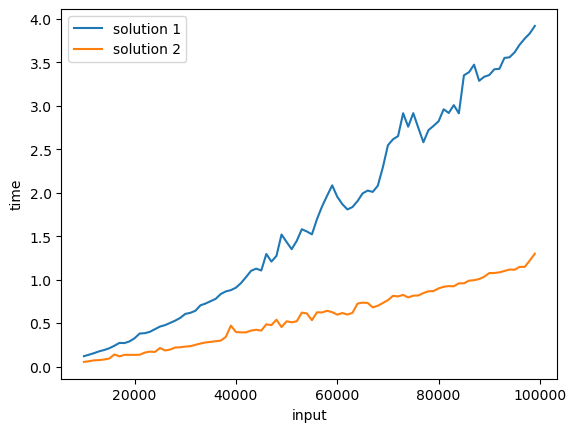

In [3]:
from utils.plotting import plot_range

params = tuple((i, ) for i in range(10000, 100000, 1000))
plot_range(params, (solution_one, solution_two))